# Lab 7: Searching

Instructor: Sirasit Lochanachit

Course: 01526102 Data Sturctures and Algorithms

## Gentle reminder of Big-O of data structures' operations

Array or list:
- Searching (indexing): __*O(1)*__
- Appending: __*O(1)*__
- Linear Search (unsorted data): __*O(N)*__
- Binary Search (sorted data): __*O(log N)*__
- Insertion/Deletion: __*O(N)*__

Linkedlist:
- Searching: __*O(N)*__
- Appending: __*O(1)*__
- Insertion/Deletion: __*O(1)*__

## Lab 7-1: Implement Linear/Sequential Search and Binary Search

Write a linear/sequential search function to search for a target in a given list
- If a target is found, print an __index__ of the target and return `True`
- If a target is not found, return `False`

In [3]:
def linear_search(data, target):
    for i in data:
      if i == target:
        return True
    return False

In [4]:
data = [10,20,40,50]
linear_search(data,40)

True

In [5]:
linear_search(data,100)

False

Write a binary search function to search for a target in a given list
- If a target is found, print an __index__ of the target and return `True`
- If a target is not found, return `False`

In [6]:
# Non-recursive version
def binary_search_iterative(data, target):
    low = 0
    high = len(data) - 1
    mid = 0

    while low <= high:

        mid = (high + low) // 2

        # If x is greater, ignore left half
        if data[mid] < target:
            low = mid + 1

        # If x is smaller, ignore right half
        elif data[mid] > target:
            high = mid - 1

        # means x is present at mid
        elif data[mid] == target:
          return True

    # If we reach here, then the element was not present
    return False

In [7]:
binary_search_iterative(data,40)

True

In [8]:
binary_search_iterative(data,100)

False

## Comparison to <code>dict</code>

The `dict` types don't support access by a positional value (i.e., by index), but do support lookup/search.

How fast do dict add & search operations fare compared to lists?

In [72]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

ns = np.linspace(100, 10_000, 50, dtype=int)

ts_linsearch = [timeit.timeit('linear_search(lst, lst[-1])',
                              setup=f'lst = list(range({n}))',
                              globals=globals(),
                              number=100)
                for n in ns]

ts_binsearch = [timeit.timeit('binary_search_iterative(lst, 0)',
                              setup=f'lst = list(range({n}))',
                              globals=globals(),
                              number=100)
                for n in ns]

ts_dctadd    = [timeit.timeit(f'dct[{n}] = 0',
                              setup=f'dct = {{x:x for x in range({n})}}',
                              globals=globals(),
                              number=100)
                for n in ns]

ts_dctsearch = [timeit.timeit(f'{0} in dct', # try for other values
                              setup=f'dct = {{x:x for x in range({n})}}',
                              globals=globals(),
                              number=100)
                for n in ns]

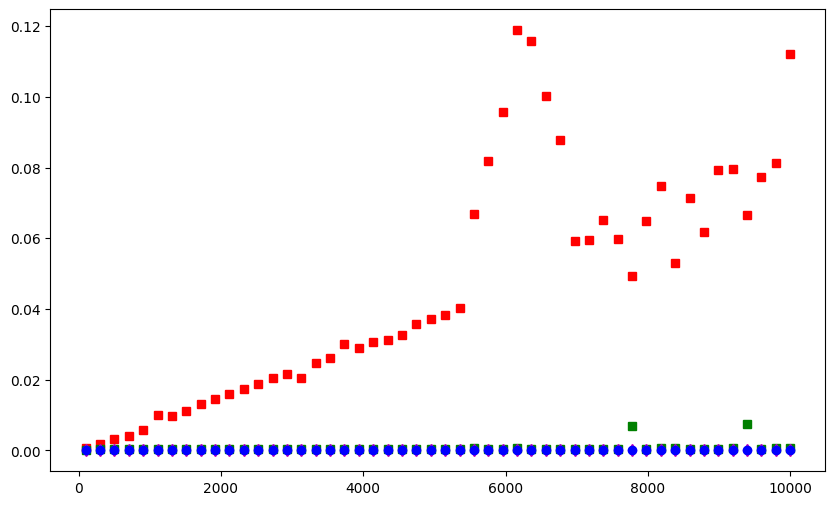

In [73]:
plt.plot(ns, ts_linsearch, 'sr') # Square Red
plt.plot(ns, ts_binsearch, 'sg') # Square Green

plt.plot(ns, ts_dctadd, 'dm');   # Diamond Magenta
plt.plot(ns, ts_dctsearch, 'ob'); # Circle Blue

 Dictionaries appear to be able to implement insertion and search in constant time even though it doesn't have an index to access elements

## Direct lookups via Hashing

Hashes (a.k.a. hash codes or hash values) are simply numerical values computed for objects.

In [11]:
hash('hello')

-9034700036884428426

In [12]:
hash('skywalker')

1023520158826697088

In [13]:
hash('skywalkers')

3862975393378039908

In [14]:
hash('skywalked')

-4513636160248509510

In [15]:
[hash(s) for s in ['different', 'objects', 'have', 'very', 'different', 'hashes']]

[8228509013456998578,
 1071062528184771126,
 -2697213334932082439,
 -4755211520676683991,
 8228509013456998578,
 1792057250204585719]

How about modulo division (i.e. bucket)?

In [16]:
[hash(s)%100 for s in ['different', 'objects', 'have', 'very', 'different', 'hashes']]

[78, 26, 61, 9, 78, 19]

### Random Hashing

The `hash` function in Python is _randomized_ by default -- i.e., each time a Python interpreter is fired up, the implementation of `hash` will use a different "seed" for the random number generator used in computing hashes.

- While hashcodes computed for a given value will be consistent for a given interpreter instance, they will not be across instances!
- This means we shouldn't save hashcodes for values to disk, or save them to a database, as values will almost certainly hash to different hashcodes after we restart our software!

## Hashtables

A hashtable is an implementation of the "map" abstract data type (aka "dictionary"), which associate keys (must be unique) with values. \

A hashtable uses the hashcode for a key to compute an index into an array where the corresponding key/value pair will be stored.

In [17]:
class Hashtable:
    def __init__(self, n_buckets):
        self.buckets = [None] * n_buckets

    def __setitem__(self, key, val):
        bidx = hash(key) % len(self.buckets)
        self.buckets[bidx] = [key, val]

    def __getitem__(self, key):
        bidx = hash(key) % len(self.buckets)
        if self.buckets[bidx] is not None:
            return self.buckets[bidx][1]
        else:
            raise KeyError(key)

    def __contains__(self, key):
        try:
            _ = self[key]
            return True
        except:
            return False

In [18]:
ht = Hashtable(75)
ht[175] = 'Tony Stark'
ht[100] = 'Steve Rogers'
ht[275] = 'Peter Parker'

In [19]:
ht[175]

'Steve Rogers'

In [20]:
ht[100]

'Steve Rogers'

Collision?

In [21]:
ht[275]

'Peter Parker'

In [22]:
print(hash(175)%75)
print(hash(100)%75)
print(hash(275)%75)

25
25
50


## Lab 7-2: Dealing with Collisions

Implement insertData method in a Hastable class to insert a key/value pair
- Calculate the hashkey to find out which bucket to insert the key/value pair using division modulo: $ hash(k) $ mod $n$, where $n$ is the number of buckets
- Rehash the key if the collision occurs using Linear Probing
  - If the number of collision is equal to the number of buckets, stop the insertion and return "Bucket is Full"
- If cannot insert, return Error

Implement searchData method in a Hashtable class to search for a given key
- Calculate the hashkey to find out which bucket to search insert the key/value pair using division modulo: $ hash(k) $ mod $n$, where $n$ is the number of buckets
- Rehash the key if the collision occurs using Linear Probing and continues the search
  - If the number of collision is equal to the number of buckets, stop the search and return "Not Found"
- If not found, return "Not Found"

In [66]:
class Hashtable:
    def __init__(self, n_buckets):
        self.buckets = [None] * n_buckets

    def __setitem__(self, key, val):
        bidx = hash(key) % len(self.buckets)
        self.buckets[bidx] = [key, val]

    def __getitem__(self, key):
        bidx = hash(key) % len(self.buckets)
        if self.buckets[bidx] is not None:
            return self.buckets[bidx][1]
        else:
            raise KeyError(key)

    def __contains__(self, key):
        try:
            _ = self[key]
            return True
        except:
            return False

    def insertData(self, key, val):
          bidx = hash(key) % len(self.buckets)
          initial_bidx = bidx
          collisions = 0

          while self.buckets[bidx] is not None:
              if self.buckets[bidx][0] == key:
                  self.buckets[bidx][1] = val
                  return
              collisions += 1
              bidx = (initial_bidx + collisions) % len(self.buckets)
              if collisions == len(self.buckets):
                  return "Bucket is Full"
          self.buckets[bidx] = [key, val]
          print("Insert "+str(key) + " " + "at Index " + str(bidx))
    def searchData(self, key):
        bidx = hash(key) % len(self.buckets)
        initial_bidx = bidx
        collisions = 0
        while self.buckets[bidx] is not None:
            if self.buckets[bidx][0] == key:
                print("Found " + str(key) + " at index " + str(bidx))
                return self.buckets[bidx][1]
            collisions += 1
            bidx = (initial_bidx + collisions) % len(self.buckets)
            if collisions == len(self.buckets):
                return "Not Found"

        return "Not Found"

In [67]:
ht = Hashtable(75)
ht.insertData(175, 'Tony Stark')
ht.insertData(100, 'Steve Rogers')
ht.insertData(275, 'Peter Parker')

Insert 175 at Index 25
Insert 100 at Index 26
Insert 275 at Index 50


In [68]:
ht.searchData(175)

Found 175 at index 25


'Tony Stark'

In [69]:
ht.searchData(100)

Found 100 at index 26


'Steve Rogers'

In [70]:
ht.searchData(275)

Found 275 at index 50


'Peter Parker'

In [71]:
ht.searchData(300)

'Not Found'